# EXPLORATORY DATA ANALYSIS - SP500 COMPANIES & STOCK DATA
### Contexto e Objetivo

Este projeto tem como objetivo uma Análise Exploratória de Dados (EDA) do conjunto de dados das empresas que compõem o índice S&P 500, um dos principais indicadores do mercado financeiro dos Estados Unidos. O índice S&P 500 é composto pelas 500 maiores empresas, listadas principalmente nas bolsas NYSE e NASDAQ, abrangendo varios setores e indústrias.

##### A análise se baseia em dois conjuntos de dados principais:
* **Empresas do S&P 500:** Contendo informações sobre a bolsa onde estão listadas, dados financeiros (como valor de mercado e crescimento da receita), setor, indústria e localização geográfica.
* **Ações das Empresas do S&P 500:** Complementando com dados históricos das ações, como preços diários de abertura e fechamento, volume negociado e variação de preços.


Com esta análise, busquei entender as características principais dessas empresas, explorar os padrões financeiros e de mercado, além de identificar possíveis insights úteis para analistas, investidores ou para estudos econômicos.  Esta análise tentará responder perguntas como:

- Qual é a distribuição dos setores e indústrias no índice S&P 500?
- Quais são as empresas com maior valor de mercado?
- Qual é a distribuição geográfica dessas empresas?
- Como os preços das ações variam ao longo do tempo?

### Conjunto de Dados

Os conjuntos de dados foram retirados do Kaggle, disponível em [S&P 500 Stocks (daily updated)](https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks). Eles contêm os seguintes campos:

##### **1. Empresas do S&P 500** 

* **exchange:** Bolsa de valores onde a ação da empresa está listada (Ex.: "NMS" para NASDAQ).
* **symbol:** Símbolo usado para identificar a ação.
* **shortname:** Nome abreviado da empresa.
* **longname:** Nome completo da empresa.
* **sector:** Setor onde a empresa atua (Ex.: "Technology", "Communication Services").
* **industry:** Indústria específica dentro de um setor onde a empresa atua (e.g., "Consumer Electronics", "Semiconductors").
* **currentprice:** Preço atual das ações.
* **marketcap:** Valor de mercado da empresa em dólares, representando o valor total de suas ações.
* **ebitda:** Lucros antes de juros, impostos, depreciação e amortização (EBITDA) em dólares.
* **revenuegrowth:** Taxa de crescimento da receita da empresa.
* **city:** Cidade onde a sede da empresa está localizada (cidade matriz).
* **state:** Estado onde a empresa está localizada.
* **country:** País onde a empresa está localizada.
* **fulltimeemployees:** Número de funcionários em tempo integral.
* **longbusinesssummary:** Resumo da empresa. 

##### **2. Dados Históricos das Ações do S&P 500** 
* **date:** Data da transação.
* **symbol:** Símbolo/ticker da ação para identificar a empresa.
* **adj_close:** Preço ajustado de fechamento da ação (considerando dividendos e splits).
* **close:** Preço de fechamento da ação no dia.
* **high:** Preço máximo da ação no período.
* **low:** Preço mínimo no período.
* **open:** Preço de abertura no mercado.
* **volume:** Volume total de ações negociadas no período.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
from IPython.display import display

In [2]:
df_companies= pd.read_csv('database/sp500_companies.csv')
df_companies.columns = df_companies.columns.str.lower().str.replace(' ', '_')

df_companies.head()

FileNotFoundError: [Errno 2] No such file or directory: 'database/sp500_companies.csv'

In [207]:
df_companies.info()
df_companies.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   exchange             503 non-null    object 
 1   symbol               503 non-null    object 
 2   shortname            503 non-null    object 
 3   longname             503 non-null    object 
 4   sector               503 non-null    object 
 5   industry             503 non-null    object 
 6   currentprice         503 non-null    float64
 7   marketcap            503 non-null    int64  
 8   ebitda               474 non-null    float64
 9   revenuegrowth        501 non-null    float64
 10  city                 503 non-null    object 
 11  state                483 non-null    object 
 12  country              503 non-null    object 
 13  fulltimeemployees    499 non-null    float64
 14  longbusinesssummary  503 non-null    object 
 15  weight               503 non-null    flo

,currentprice,marketcap,ebitda,revenuegrowth,fulltimeemployees,weight
count,503.000000,5.030000e+02,4.740000e+02,501.000000,4.990000e+02,503.000000
mean,221.323072,1.056912e+11,6.805585e+09,0.058778,5.802898e+04,0.001988
std,509.696808,3.090187e+11,1.485991e+10,0.142305,1.389014e+05,0.005813
min,8.240000,6.415600e+09,-4.107000e+09,-0.573000,2.800000e+01,0.000121
25%,69.895000,1.998471e+10,1.585225e+09,-0.001000,1.018550e+04,0.000376
50%,125.090000,3.706336e+10,2.880500e+09,0.048000,2.124900e+04,0.000697
75%,238.135000,7.919065e+10,5.896271e+09,0.098000,5.496600e+04,0.001490
max,9473.010000,3.469576e+12,1.317810e+11,1.430000,2.100000e+06,0.065263


In [208]:
df_companies.isnull().sum()
# df.duplicated().sum()

exchange                0
symbol                  0
shortname               0
longname                0
sector                  0
industry                0
currentprice            0
marketcap               0
ebitda                 29
revenuegrowth           2
city                    0
state                  20
country                 0
fulltimeemployees       4
longbusinesssummary     0
weight                  0
dtype: int64

In [209]:
# Exibir todas as linhas onde há pelo menos um valor ausente independente da coluna
# missing_data = df[df.isnull().any(axis=1)]

# Coluna específica
# missing_data = df[df['revenuegrowth'].isnull()]
# print(missing_data)

# Quantidade de empresas e ações distintas
print(df_companies['shortname'].nunique())
print(df_companies['symbol'].nunique())

# Empresas com mais de uma ações listada
acoes_por_empresa = df_companies.groupby('shortname').size()
empresas_varias_acoes = acoes_por_empresa[acoes_por_empresa > 1].index
print(empresas_varias_acoes)

resultado = df_companies[df_companies['shortname'].isin(empresas_varias_acoes)][['shortname', 'symbol']]
print(resultado)


500
503
Index(['Alphabet Inc.', 'Fox Corporation', 'News Corporation'], dtype='object', name='shortname')
            shortname symbol
3       Alphabet Inc.  GOOGL
4       Alphabet Inc.   GOOG
397   Fox Corporation    FOX
398   Fox Corporation   FOXA
433  News Corporation   NWSA
434  News Corporation    NWS


## Análise Exploratória de Dados (COMPANIES)

### 1. Distribuição de Empresas por Bolsa de Valores (Exchange)

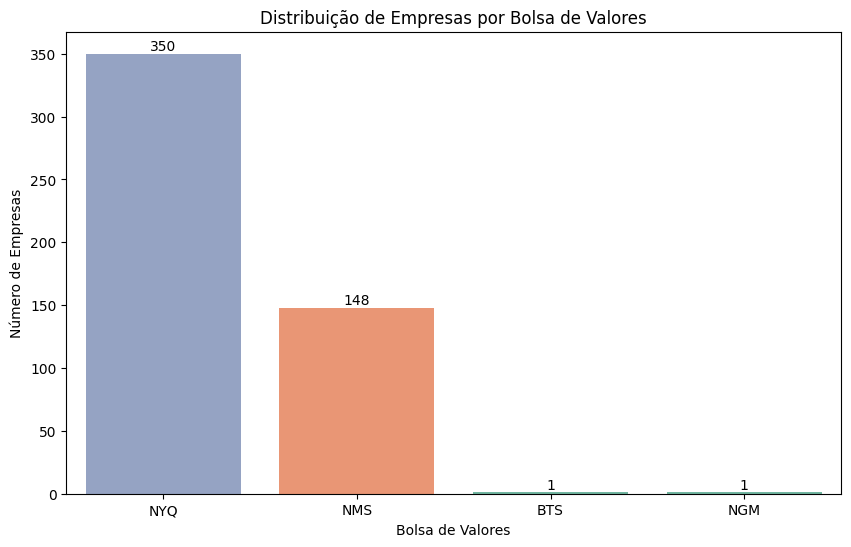

In [210]:
# Filtrar empresas únicas
df_companies_unique = df_companies.drop_duplicates(subset='shortname')

companies_by_exchange = df_companies_unique['exchange'].value_counts()

# print(companies_by_exchange)

plt.figure(figsize=(10, 6))

axes = sns.barplot(x=companies_by_exchange.index, y=companies_by_exchange.values, palette='Set2', hue=companies_by_exchange, legend=False)

plt.title('Distribuição de Empresas por Bolsa de Valores')
plt.xlabel('Bolsa de Valores')
plt.ylabel('Número de Empresas')

for i in axes.patches:
    axes.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2., i.get_height()),  ha='center', va='bottom')

plt.show()

* NYQ (NYSE) domina com 350 empresas, seguido por NMS (NASDAQ) com 148 empresas.
* Apenas 2 empresas estão listadas em exchanges menores: BTS e NGM (1 empresa cada).

* **Principal Insight:** O mercado é altamente concentrado nessas duas grandes bolsas de valores, NYSE e NASDAQ, que representam quase a totalidade das empresas analisadas, destacando a relevância dessas duas bolsas nos EUA.

### 2. Distribuição de Setores e Indústrias

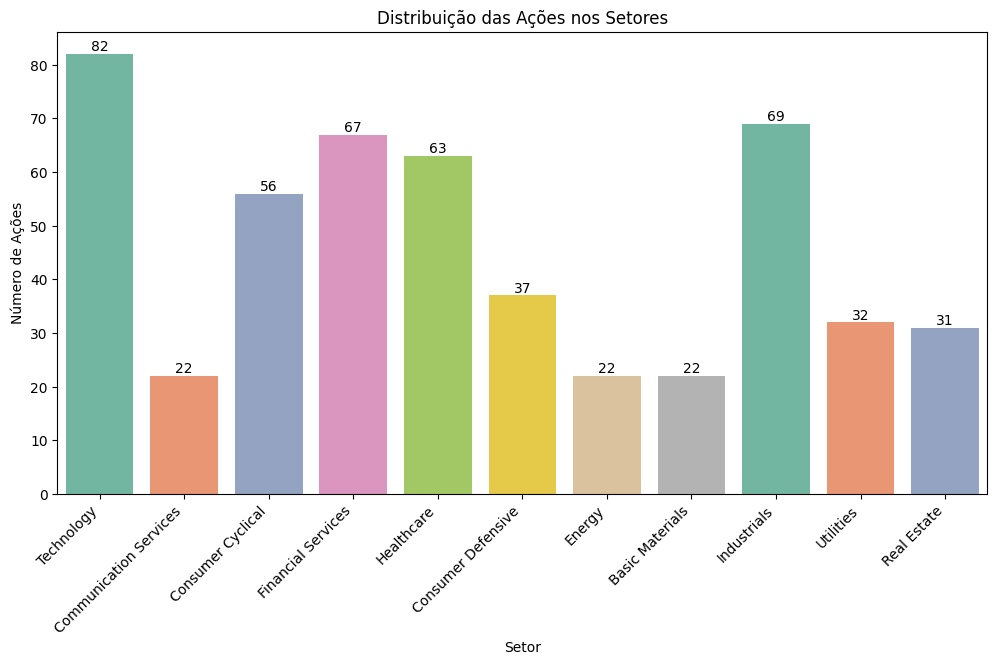

In [211]:
# print(df.groupby('sector').size())
# print(len(df))

plt.figure(figsize=(12, 6))

axes = sns.countplot(x='sector', data=df_companies, hue='sector', palette='Set2', legend=False)

plt.title('Distribuição das Ações nos Setores')
plt.xlabel('Setor')
plt.ylabel('Número de Ações')

plt.xticks(rotation=45, ha='right') # Ajustando a rotação dos rótulos do eixo x

# Adicionando os valores nas barras
for i in axes.patches:
    axes.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2., i.get_height()),  ha='center', va='bottom')

plt.show()

Número de Indústrias Distintas: 114


,Indústria,Número de Ações
0,Utilities - Regulated Electric,23
1,Specialty Industrial Machinery,16
2,Software - Application,15
3,Software - Infrastructure,14
4,Semiconductors,14
...,...,...
109,Apparel Manufacturing,1
110,"Furnishings, Fixtures & Appliances",1
111,Leisure,1
112,Luxury Goods,1


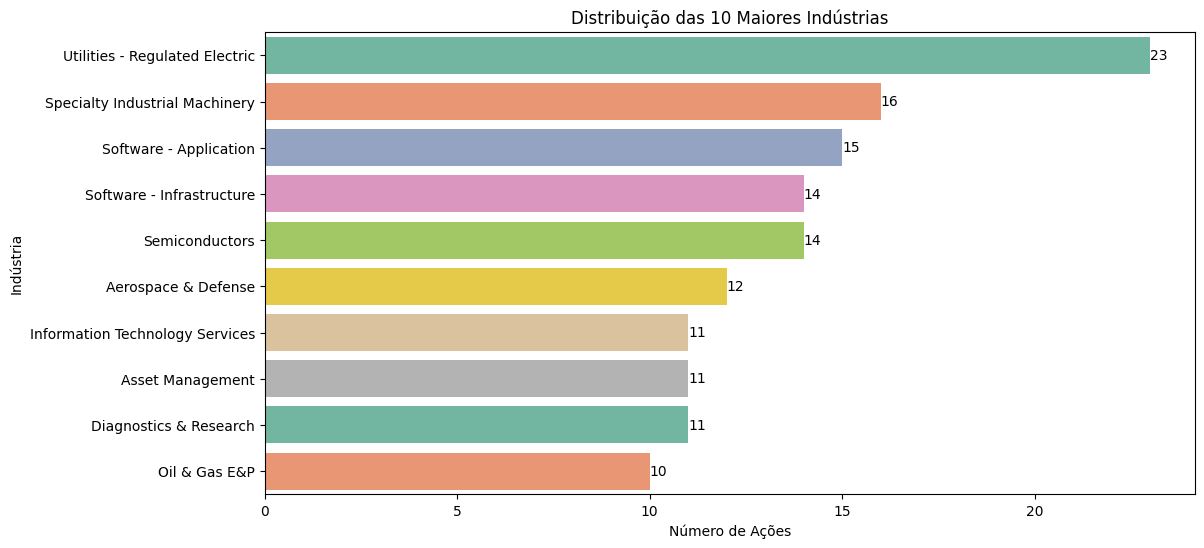

In [212]:
print(f'Número de Indústrias Distintas: {df_companies['industry'].nunique()}')

#  EXIBIR TABELA
distribution_industry = df_companies['industry'].value_counts().reset_index()
distribution_industry.columns = ['Indústria', 'Número de Ações']
distribution_industry = distribution_industry.sort_values(by='Número de Ações', ascending=False)

display(distribution_industry)

# EXIBIR AS 10 MAIORES
top_industries = distribution_industry.nlargest(10, 'Número de Ações')
# print(top_industries)

plt.figure(figsize=(12, 6))
axes = sns.barplot(y='Indústria', x='Número de Ações', data=top_industries, palette='Set2', hue='Indústria', legend=False)

for i in axes.patches:
    axes.annotate(f'{int(i.get_width())}', (i.get_width(), i.get_y() + i.get_height() / 2.), ha='left', va='center')

plt.title('Distribuição das 10 Maiores Indústrias')
plt.xlabel('Número de Ações')
plt.ylabel('Indústria')
plt.show()

* **Principal Insight:** O setor de tecnologia lidera em termos de número de ações (ou empresas), o que condiz com sua influência crescente no mercado. Dentro das indústrias, *Utilities - Regulated Electric* se destaca, mostrando a importância do setor de serviços públicos, seguido por maquinário industrial e software.

### 3. Distribuição do Peso no S&P 500 por Setor

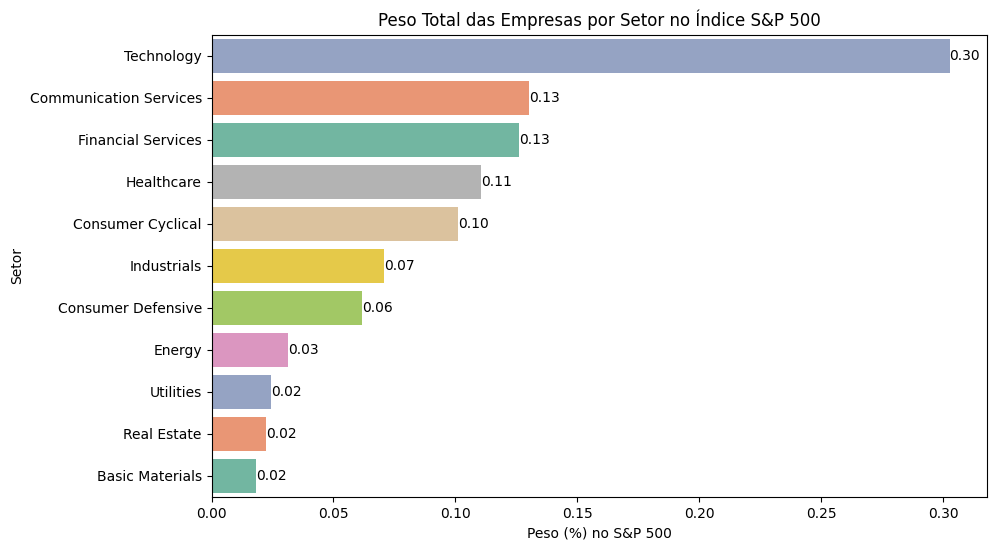

In [213]:
weight_by_sector = df_companies.groupby('sector')['weight'].sum().sort_values(ascending=False)
# print(weight_by_sector)

plt.figure(figsize=(10, 6))
axes = sns.barplot(x=weight_by_sector.values, y=weight_by_sector.index, palette='Set2', hue=weight_by_sector, legend=False)

for i in axes.patches:
    axes.annotate(f'{i.get_width():.2f}', (i.get_width(), i.get_y() + i.get_height() / 2.), ha='left', va='center')

plt.title('Peso Total das Empresas por Setor no Índice S&P 500')
plt.xlabel('Peso (%) no S&P 500')
plt.ylabel('Setor')
plt.show()


* **Principal Insight:** O setor de tecnologia não só tem o maior número de empresas, mas também carrega o maior peso no S&P 500, sendo responsável por mais de 30% do índice. Isso reflete a dominância de gigantes como Apple, Microsoft e NVIDIA, que possuem grande influência no desempenho do mercado.

### 4. Empresas com Maior Valor de Mercado

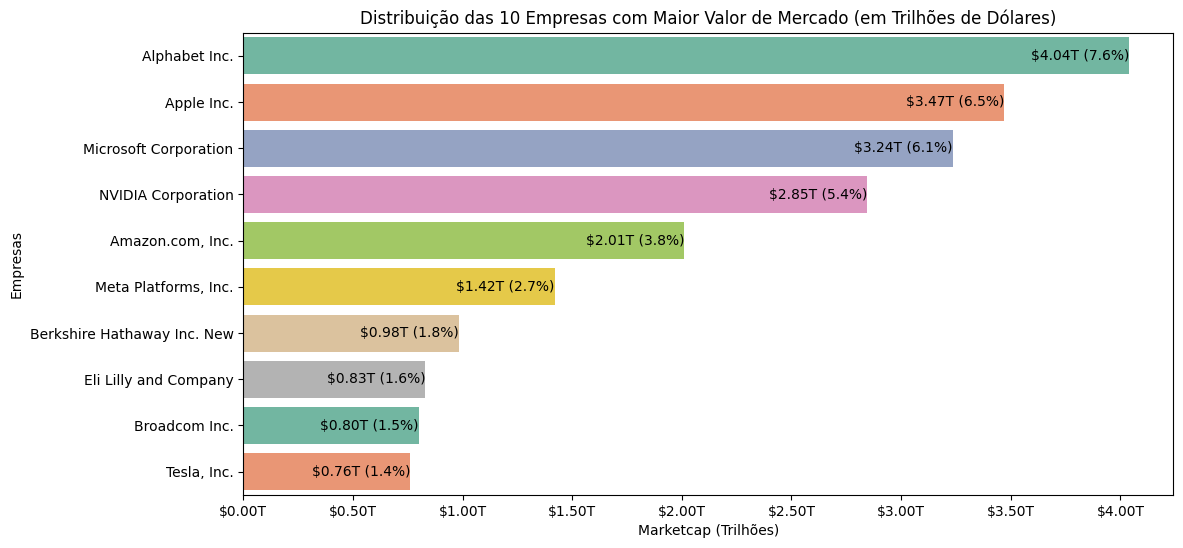

In [214]:
df_companies_grouped = df_companies.groupby('shortname', as_index=False).agg({'marketcap': 'sum'})

total_marketcap = df_companies_grouped['marketcap'].sum()
top_marketcap = df_companies_grouped.nlargest(10, 'marketcap')

top_marketcap['marketcap_trilhoes'] = top_marketcap['marketcap'] / 1_000_000_000_000
top_marketcap['percentage'] = (top_marketcap['marketcap'] / total_marketcap) * 100


plt.figure(figsize=(12, 6))
axes = sns.barplot(y='shortname', x='marketcap_trilhoes', data=top_marketcap, palette='Set2', hue='shortname', legend=False)

for i, bar in enumerate(axes.patches):
    width = bar.get_width()
    percentage = top_marketcap['percentage'].iloc[i]
    axes.annotate(f'${width:,.2f}T ({percentage:.1f}%)', (width, bar.get_y() + bar.get_height() / 2.), ha='right', va='center')

axes.xaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.2f}T'))

plt.title('Distribuição das 10 Empresas com Maior Valor de Mercado (em Trilhões de Dólares)')
plt.xlabel('Marketcap (Trilhões)')
plt.ylabel('Empresas')

plt.show()

* **Principal Insight:** As empresas de tecnologia dominam a lista das maiores em valor de mercado, com Alphabet, Apple, Microsoft e NVIDIA no topo, seguidas de gigantes como Amazon e Meta. Isso reforça a enorme capitalização de mercado do setor tecnológico no cenário global.

### 5. Distribuição Geográfica:

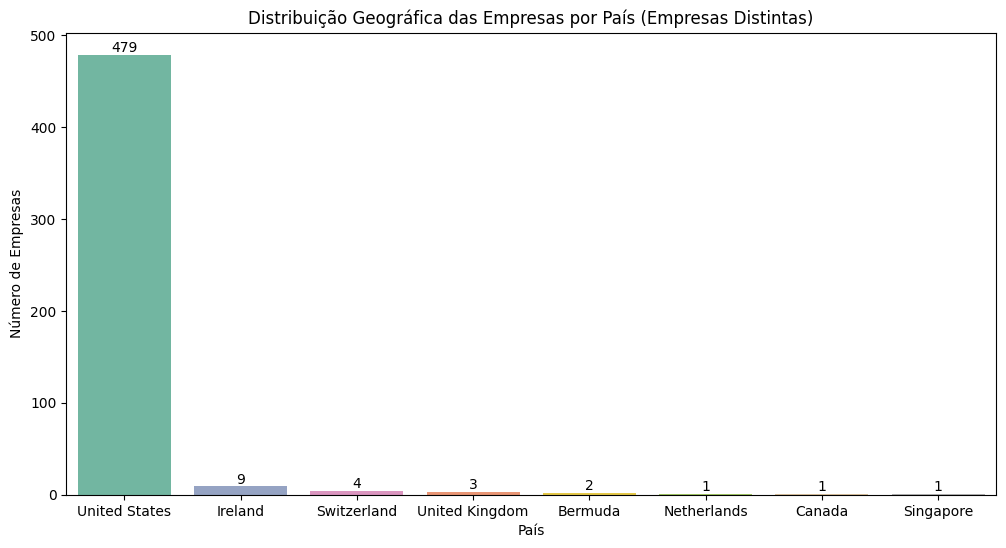

In [215]:
df_companies_unique = df_companies.drop_duplicates(subset=['shortname'])

country_counts = df_companies_unique['country'].value_counts()

plt.figure(figsize=(12, 6))

axes = sns.countplot(x='country', data=df_companies_unique, order=country_counts.index, palette='Set2', hue='country', legend=False)

plt.title('Distribuição Geográfica das Empresas por País (Empresas Distintas)')
plt.xlabel('País')
plt.ylabel('Número de Empresas')

for i in axes.patches:
    axes.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2., i.get_height()), ha='center', va='bottom')

plt.show()

* **Principal Insight:** O mercado de capitais analisado é amplamente dominado por empresas americanas, refletindo a forte posição dos EUA no mercado global. Algumas empresas multinacionais fora dos EUA, especialmente na Europa, também aparecem, mas em menor quantidade.

### Principais Conclusões Gerais:
* NYSE e NASDAQ abrigam quase todas as empresas, sublinhando a centralização das maiores corporações nessas bolsas.

* Empresas de tecnologia são líderes tanto em número quanto em peso no S&P 500, com grandes empresas como Alphabet, Apple, Microsoft e NVIDIA dominando.

* A maioria das empresas está sediada nos EUA, refletindo sua posição como o centro financeiro mundial.

* Embora a tecnologia tenha o maior peso, setores como healthcare, serviços financeiros e comunicação ainda possuem um impacto significativo no mercado.

* Indústrias como "Regulated Electric Utilities" e "Specialty Industrial Machinery" são as mais representadas, além das gigantes tecnológicas.

## Análise Exploratória de Dados (STOCKS)

In [216]:
df_stocks = pd.read_csv('database/stocks_2023-2024.csv')

df_stocks.head()

,date,symbol,adj_close,close,high,low,open,volume,year,month
0,2023-01-03,MMM,93.823418,102.399666,102.541809,100.643814,101.605354,3124909.0,2023,1
1,2023-01-04,MMM,95.876541,104.640465,104.757523,102.600334,103.135452,3312561.0,2023,1
2,2023-01-05,MMM,94.198799,102.809364,104.155518,102.391304,103.854515,3117494.0,2023,1
3,2023-01-06,MMM,97.079315,105.953178,106.295990,103.469902,104.230766,2890732.0,2023,1
4,2023-01-09,MMM,97.132927,106.011703,108.244148,105.443146,106.187294,3434075.0,2023,1


In [217]:
df_stocks.isnull().sum()
# df.duplicated().sum()

date            0
symbol          0
adj_close    1273
close        1273
high         1273
low          1273
open         1273
volume       1273
year            0
month           0
dtype: int64

In [218]:
missing_data = df_stocks[df_stocks.isnull().any(axis=1)]
print(missing_data)

              date symbol  adj_close  close  high  low  open  volume  year  \
91152   2023-01-03    GEV        NaN    NaN   NaN  NaN   NaN     NaN  2023   
91153   2023-01-04    GEV        NaN    NaN   NaN  NaN   NaN     NaN  2023   
91154   2023-01-05    GEV        NaN    NaN   NaN  NaN   NaN     NaN  2023   
91155   2023-01-06    GEV        NaN    NaN   NaN  NaN   NaN     NaN  2023   
91156   2023-01-09    GEV        NaN    NaN   NaN  NaN   NaN     NaN  2023   
...            ...    ...        ...    ...   ...  ...   ...     ...   ...   
202792  2023-09-27   VLTO        NaN    NaN   NaN  NaN   NaN     NaN  2023   
202793  2023-09-28   VLTO        NaN    NaN   NaN  NaN   NaN     NaN  2023   
202794  2023-09-29   VLTO        NaN    NaN   NaN  NaN   NaN     NaN  2023   
202795  2023-10-02   VLTO        NaN    NaN   NaN  NaN   NaN     NaN  2023   
202796  2023-10-03   VLTO        NaN    NaN   NaN  NaN   NaN     NaN  2023   

        month  
91152       1  
91153       1  
91154       1  

In [219]:
df_stocks.describe()

,adj_close,close,high,low,open,volume,year,month
count,216023.000000,216023.000000,216023.000000,216023.000000,216023.000000,2.160230e+05,217296.000000,217296.000000
mean,183.990369,185.894635,187.817502,183.870019,185.830043,5.801206e+06,2023.421296,5.840278
std,383.186852,383.625556,387.550870,379.555331,383.378117,2.393999e+07,0.493768,3.176155
min,6.320000,6.320000,6.450000,6.090000,6.400000,0.000000e+00,2023.000000,1.000000
25%,58.716230,60.184999,60.770000,59.570000,60.169998,1.006000e+06,2023.000000,3.000000
50%,107.809746,109.870003,111.099998,108.639999,109.889999,2.025500e+06,2023.000000,6.000000
75%,204.528328,206.669998,208.794998,204.495003,206.610001,4.552350e+06,2024.000000,8.000000
max,9659.650391,9659.650391,9696.860352,9542.500000,9612.040039,1.543911e+09,2024.000000,12.000000
